# Project 1: Analysis of Various Metrics and How They Relate to Stress and Work-Life Balance

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Exploration

In [2]:
# Read csv file
wellbeing_df = pd.read_csv('data/Wellbeing_and_lifestyle_data_Kaggle.csv')
wellbeing_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [3]:
wellbeing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [4]:
# Check the datatypes of each column
column_data_types = wellbeing_df.dtypes
print(column_data_types)

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


In [14]:
# Change the datatype of the stress column to an integer

# First find the row(s) that is NOT a number on the stress scale
stress_scores = wellbeing_df['DAILY_STRESS'].unique()

# Convert the stress scores into a list
stress_scores_list = list(stress_scores)
print(stress_scores_list)

# From the list, drop the values that are not valid stress scores
invalid_response = '1/1/00'

# Create a variable to filter for the invalid response
drop_response = (wellbeing_df['DAILY_STRESS'] == invalid_response)

# Drop the row containing the invalid response
wellbeing_df = wellbeing_df.loc[~drop_response]
wellbeing_df

# Convert the daily stress column to an integer and check it was converted correctly
wellbeing_df['DAILY_STRESS'] = wellbeing_df['DAILY_STRESS'].astype(int)
wellbeing_df.info()

# Rename the age values for clarity purposes
wellbeing_df = wellbeing_df.replace("Less than 20", "20 or Younger")
wellbeing_df = wellbeing_df.replace("51 or more", "51 or Older")

# Create bins to categorize work life balance scores 
bins =[0, 550, 680, 900]
group_names = ['Poor', 'Good', 'Excellent']
wellbeing_df['Work Life Summary'] = pd.cut(wellbeing_df['WORK_LIFE_BALANCE_SCORE'], bins, labels=group_names, include_lowest=True)


[2, 3, 1, 4, 5, 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Timestamp                15971 non-null  object  
 1   FRUITS_VEGGIES           15971 non-null  int64   
 2   DAILY_STRESS             15971 non-null  int32   
 3   PLACES_VISITED           15971 non-null  int64   
 4   CORE_CIRCLE              15971 non-null  int64   
 5   SUPPORTING_OTHERS        15971 non-null  int64   
 6   SOCIAL_NETWORK           15971 non-null  int64   
 7   ACHIEVEMENT              15971 non-null  int64   
 8   DONATION                 15971 non-null  int64   
 9   BMI_RANGE                15971 non-null  int64   
 10  TODO_COMPLETED           15971 non-null  int64   
 11  FLOW                     15971 non-null  int64   
 12  DAILY_STEPS              15971 non-null  int64   
 13  LIVE_VISION              15971 non-null  i

In [27]:
# Find the total number of participants in the study
total_participants = wellbeing_df['Timestamp'].count()

# Find the total number of males
male_df = wellbeing_df[wellbeing_df['GENDER']=='Male']
male_count = male_df['Timestamp'].count()

# Find the max/min work life balance scores for males 
male_max_score = male_df['WORK_LIFE_BALANCE_SCORE'].max()
male_min_score = male_df['WORK_LIFE_BALANCE_SCORE'].min()

# Find the total number of females
female_df = wellbeing_df[wellbeing_df['GENDER']=='Female']
female_count = female_df['Timestamp'].count()

# Find the max/min work life balance scores for females
female_max_score = female_df['WORK_LIFE_BALANCE_SCORE'].max()
female_min_score = female_df['WORK_LIFE_BALANCE_SCORE'].min()

print(f'The total number of participants is {total_participants}')
print(f'The total number of males is {male_count}')
print(f'The total number of females is {female_count}')
print(f'The highest work life balance score is {male_max_score} for males and {female_max_score} for females')
print(f'The lowest work life balance score is {male_min_score} for males and {female_min_score} for females')

The total number of participants is 15971
The total number of males is 6113
The total number of females is 9858
The highest work life balance score is 820.2 for males and 802.6 for females
The lowest work life balance score is 480.0 for males and 480.0 for females


## Data Analysis for Mental Health Practices

### Mental Health Practices versus Work Life Balance Scores

In [16]:
# Create a new dataframe with the columns for flow, weekly meditation,
# and daily shouting
mental_health_df = wellbeing_df[['AGE','GENDER','FLOW',
                                 'WEEKLY_MEDITATION','DAILY_SHOUTING',
                                 'DAILY_STRESS','TIME_FOR_PASSION','WORK_LIFE_BALANCE_SCORE','Work Life Summary']]
# Rename the columns
mental_health_df = mental_health_df.rename(columns={'AGE':'Age','GENDER':'Gender','FLOW':'Flow','WEEKLY_MEDITATION':'Weekly Meditation',
                                 'DAILY_SHOUTING':'Daily Shouting','DAILY_STRESS':'Daily Stress','TIME_FOR_PASSION': 'Time for Passion','WORK_LIFE_BALANCE_SCORE':'Work Life Balance Score'},copy=False)
mental_health_df.head()                                

,Age,Gender,Flow,Weekly Meditation,Daily Shouting,Daily Stress,Time for Passion,Work Life Balance Score,Work Life Summary
0,36 to 50,Female,4,5,5,2,0,609.5,Good
1,36 to 50,Female,2,6,2,3,2,655.6,Good
2,36 to 50,Female,2,3,2,3,8,631.6,Good
3,51 or Older,Female,5,0,5,3,2,622.7,Good
4,51 or Older,Female,0,5,0,1,1,663.9,Good


In [8]:
# From the mental health df, create one for males and one for females 
male_mental_health = mental_health_df[mental_health_df['Gender'] == 'Male']
female_mental_health = mental_health_df[mental_health_df['Gender'] == 'Female']

In [17]:
# Check the skew of the male dataframe
male_skew = male_mental_health.skew()
print(male_skew)

Flow                       0.938624
Weekly Meditation         -0.354301
Daily Shouting             1.235108
Daily Stress               0.019170
Time for Passion           0.865281
Work Life Balance Score   -0.023256
dtype: float64


C:\Users\jenna\AppData\Local\Temp\ipykernel_8512\2029625620.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  male_skew = male_mental_health.skew()


In [18]:
# Check the skew of the female dataframe
female_skew = female_mental_health.skew()
print(female_skew)

Flow                       0.827980
Weekly Meditation         -0.097844
Daily Shouting             1.054884
Daily Stress              -0.127540
Time for Passion           0.823221
Work Life Balance Score   -0.153506
dtype: float64


C:\Users\jenna\AppData\Local\Temp\ipykernel_8512\1715619097.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  female_skew = female_mental_health.skew()


In [21]:
# Create summary stats table (mean and median for male vs female)
male_mental_health_grouped = male_mental_health.groupby('Work Life Summary')
female_mental_health_grouped = female_mental_health.groupby('Work Life Summary')

# Calculate each statistic
male_flow_mean = male_mental_health_grouped['Flow'].mean()
male_flow_med = male_mental_health_grouped['Flow'].median()
female_flow_mean = female_mental_health_grouped['Flow'].mean()
female_flow_med = female_mental_health_grouped['Flow'].median()
male_meditation_mean = male_mental_health_grouped['Weekly Meditation'].mean()
male_meditation_med = male_mental_health_grouped['Weekly Meditation'].median()
female_meditation_mean = female_mental_health_grouped['Weekly Meditation'].mean()
female_meditation_med = female_mental_health_grouped['Weekly Meditation'].median()
male_shouting_mean = male_mental_health_grouped['Daily Shouting'].mean()
male_shouting_med = male_mental_health_grouped['Daily Shouting'].median()
female_shouting_mean = female_mental_health_grouped['Daily Shouting'].mean()
female_shouting_med = female_mental_health_grouped['Daily Shouting'].median()
male_stress_mean = male_mental_health_grouped['Daily Stress'].mean()
male_stress_med = male_mental_health_grouped['Daily Stress'].median()
female_stress_mean = female_mental_health_grouped['Daily Stress'].mean()
female_stress_med = female_mental_health_grouped['Daily Stress'].median()
male_passion_mean = male_mental_health_grouped['Time for Passion'].mean()
male_passion_med = male_mental_health_grouped['Time for Passion'].median()
female_passion_mean = female_mental_health_grouped['Time for Passion'].mean()
female_passion_med = female_mental_health_grouped['Time for Passion'].median()

# Combine into one dataframe and rename columns
healthy_mind_summary = pd.concat([male_flow_mean,female_flow_mean,male_flow_med,female_flow_med,
                                 male_meditation_mean,female_meditation_mean,male_meditation_med,
                                 female_meditation_med,male_shouting_mean,
                                 female_shouting_mean,male_shouting_med,female_shouting_med,
                                 male_stress_mean,female_stress_mean,male_stress_med,
                                 female_stress_med,male_passion_mean,female_passion_mean,
                                 male_passion_med,female_passion_med], axis = 1)
healthy_mind_summary.columns = ['Avg Flow Hours - Male','Avg Flow Hours - Female','Median Flow Hours - Male','Median Flow Hours - Female',
                                'Avg Weekly Meditation - Male','Avg Weekly Meditation - Female','Median Weekly Meditation - Male',
                                'Median Weekly Meditation - Female','Avg Daily Shouting - Male','Avg Daily Shouting - Female',
                                'Median Daily Shouting - Male','Median Daily Shouting - Female','Avg Daily Stress - Male','Avg Daily Stress - Female',
                                'Median Daily Stress - Male','Median Daily Stress - Female','Avg Daily Time for Passion - Male','Avg Daily Time for Passion - Female',
                                'Median Daily Time for Passion - Male','Median Daily Time for Passion - Female']
healthy_mind_summary


,Avg Flow Hours - Male,Avg Flow Hours - Female,Median Flow Hours - Male,Median Flow Hours - Female,Avg Weekly Meditation - Male,Avg Weekly Meditation - Female,Median Weekly Meditation - Male,Median Weekly Meditation - Female,Avg Daily Shouting - Male,Avg Daily Shouting - Female,Median Daily Shouting - Male,Median Daily Shouting - Female,Avg Daily Stress - Male,Avg Daily Stress - Female,Median Daily Stress - Male,Median Daily Stress - Female,Avg Daily Time for Passion - Male,Avg Daily Time for Passion - Female,Median Daily Time for Passion - Male,Median Daily Time for Passion - Female
Work Life Summary,,,,,,,,,,,,,,,,,,,,
Poor,0.566667,0.931818,0.0,0.5,2.533333,1.545455,1.0,0.5,7.166667,7.250000,10.0,10.0,4.366667,4.477273,5.0,5.0,0.333333,0.568182,0.0,0.0
Good,2.425420,2.534708,2.0,2.0,5.867384,5.217182,6.0,5.0,3.039391,3.495189,2.0,3.0,2.850053,3.244674,3.0,3.0,2.468487,2.376804,2.0,2.0
Excellent,4.376703,4.260391,4.0,4.0,7.796484,7.253130,8.0,7.0,2.103736,2.397346,1.0,2.0,2.101099,2.438908,2.0,2.0,4.956044,4.652228,5.0,4.0


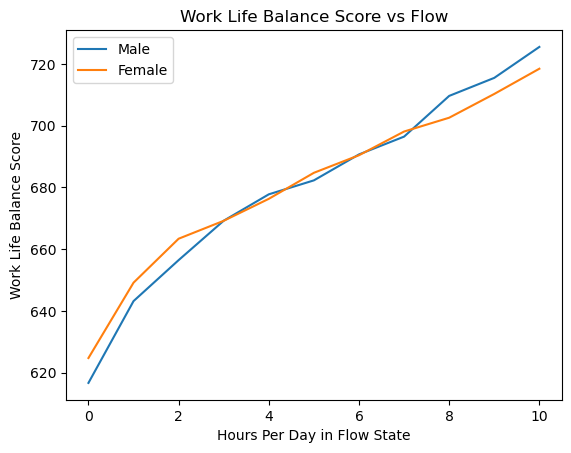

In [9]:
# Group by flow and take the average work life balance score of each group
male_flow = male_mental_health.groupby('Flow')['Work Life Balance Score'].mean()
female_flow = female_mental_health.groupby('Flow')['Work Life Balance Score'].mean()

# Plot the data
male_flow.plot(label='Male')
female_flow.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Hours Per Day in Flow State')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Flow')
plt.legend(loc='best')
plt.show()

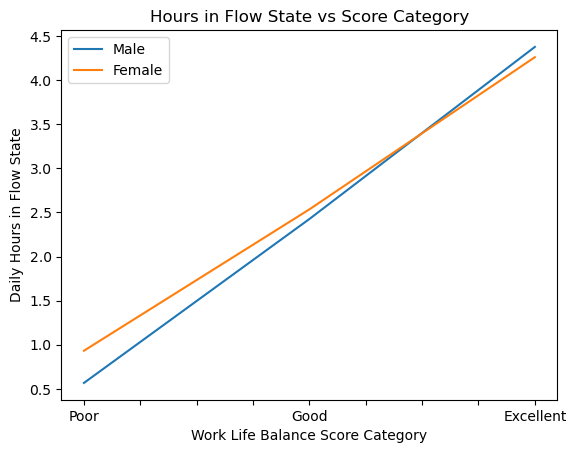

In [23]:
# Plot flow vs work life category score bin 
male_flow_mean.plot(label='Male')
female_flow_mean.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Daily Hours in Flow State')
plt.title('Hours in Flow State vs Score Category')
plt.legend(loc='best')
plt.show()

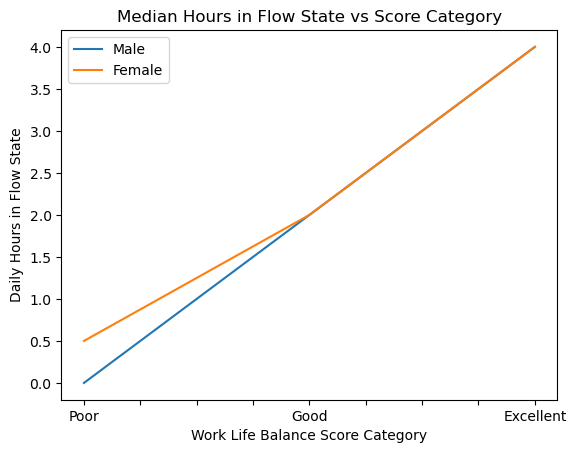

In [24]:
# Plot median (due to high skew value)
male_flow_med.plot(label='Male')
female_flow_med.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Daily Hours in Flow State')
plt.title('Median Hours in Flow State vs Score Category')
plt.legend(loc='best')
plt.show()


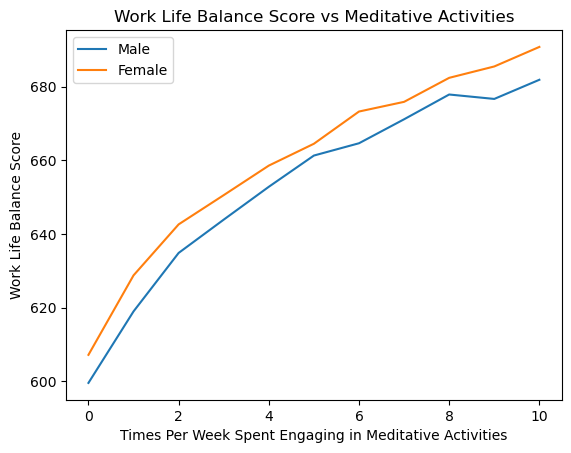

In [25]:
# Group by meditative activities and take the average work life balance score of each group
male_meditation = male_mental_health.groupby('Weekly Meditation')['Work Life Balance Score'].mean()
female_meditation = female_mental_health.groupby('Weekly Meditation')['Work Life Balance Score'].mean()

# Plot the line curves for males and females
male_meditation.plot(label='Male')
female_meditation.plot(label='Female')

plt.xlabel('Times Per Week Spent Engaging in Meditative Activities')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Meditative Activities')
plt.legend(loc='best')
plt.show()

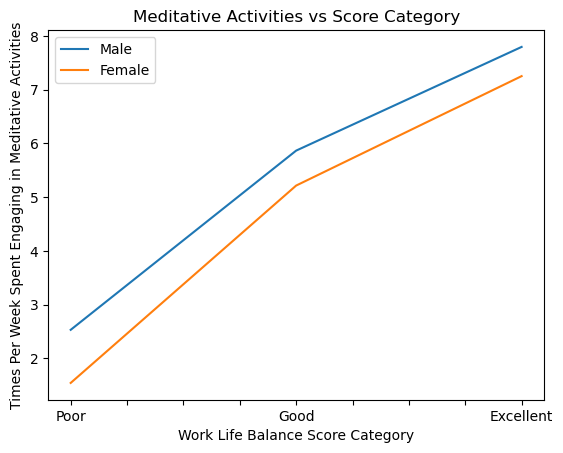

In [26]:
# Plot meditative activities vs work life score category
male_meditation_mean.plot(label='Male')
female_meditation_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Times Per Week Spent Engaging in Meditative Activities')
plt.title('Meditative Activities vs Score Category')
plt.legend(loc='best')
plt.show()

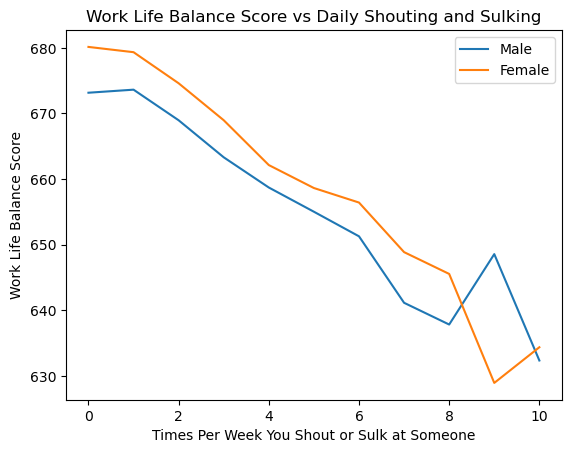

In [11]:
# Group by daily shouting and take the average work life balance score of each group 
male_shouting = male_mental_health.groupby('Daily Shouting')['Work Life Balance Score'].mean()
female_shouting = female_mental_health.groupby('Daily Shouting')['Work Life Balance Score'].mean()

# Plot the lines for males and females 
male_shouting.plot(label='Male')
female_shouting.plot(label='Female')

plt.xlabel('Times Per Week You Shout or Sulk at Someone')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Daily Shouting and Sulking')
plt.legend(loc='best')
plt.show()


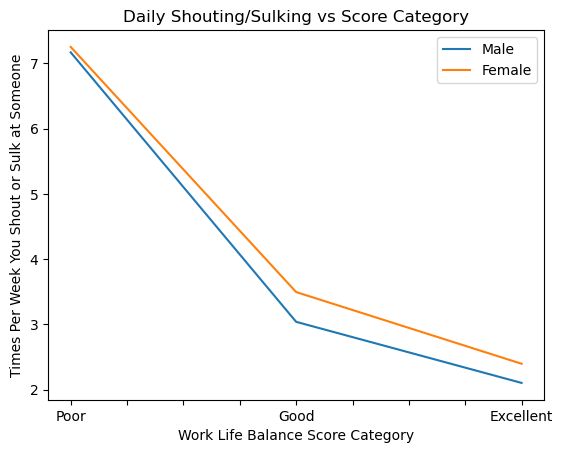

In [28]:
# Plot daily shouting vs work life score category
male_shouting_mean.plot(label='Male')
female_shouting_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Times Per Week You Shout or Sulk at Someone')
plt.title('Daily Shouting/Sulking vs Score Category')
plt.legend(loc='best')
plt.show()

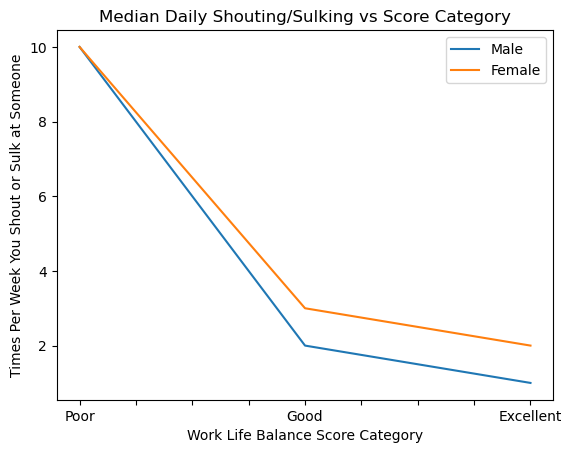

In [29]:
# Plot median (due to high skew value)
male_shouting_med.plot(label='Male')
female_shouting_med.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Times Per Week You Shout or Sulk at Someone')
plt.title('Median Daily Shouting/Sulking vs Score Category')
plt.legend(loc='best')
plt.show()

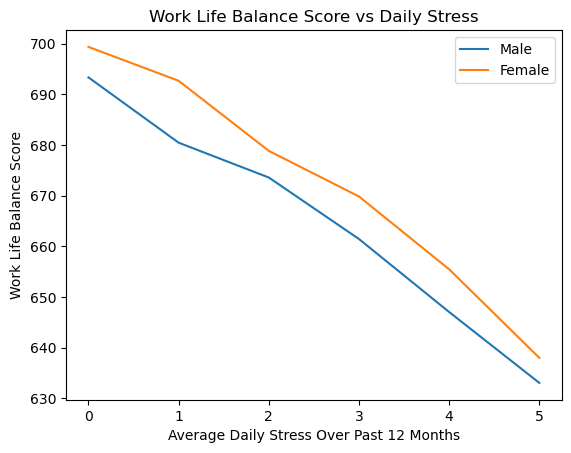

In [12]:
# Group by daily stress and take the average work life balance score of each group
male_stress = male_mental_health.groupby('Daily Stress')['Work Life Balance Score'].mean()
female_stress = female_mental_health.groupby('Daily Stress')['Work Life Balance Score'].mean()

# Plot the lines for males and females 
male_stress.plot(label='Male')
female_stress.plot(label='Female')

plt.xlabel('Average Daily Stress Over Past 12 Months')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Daily Stress')
plt.legend(loc='best')
plt.show()

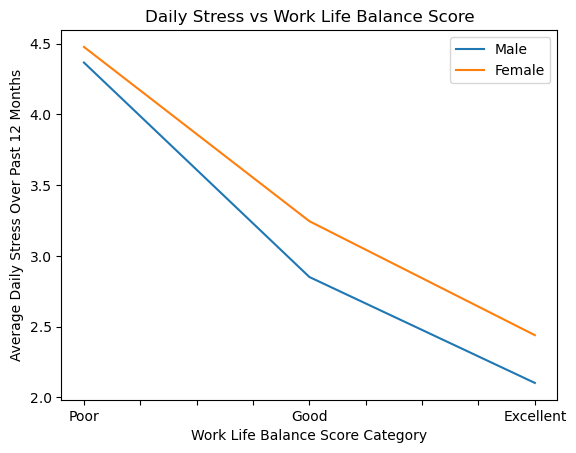

In [30]:
# Plot daily stress vs work life score categories
male_stress_mean.plot(label='Male')
female_stress_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Average Daily Stress Over Past 12 Months')
plt.title('Daily Stress vs Score Category')
plt.legend(loc='best')
plt.show()

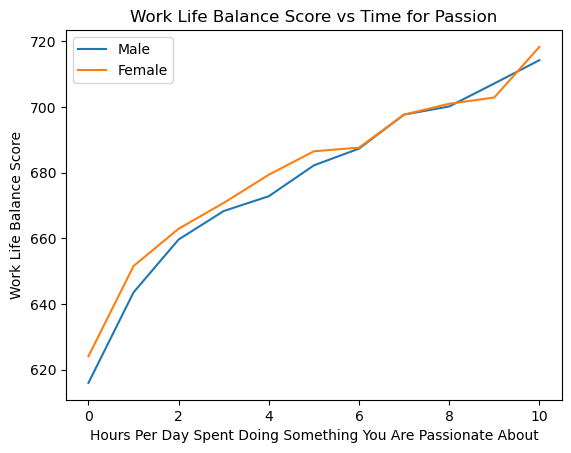

In [19]:
# Group by time for passion and take the average work life balance score of each group
male_passion = male_mental_health.groupby('Time for Passion')['Work Life Balance Score'].mean()
female_passion = female_mental_health.groupby('Time for Passion')['Work Life Balance Score'].mean()

# Plot the lines for males and females 
male_passion.plot(label='Male')
female_passion.plot(label='Female')

plt.xlabel('Hours Per Day Spent Doing Something You Are Passionate About')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Time for Passion')
plt.legend(loc='best')
plt.show()

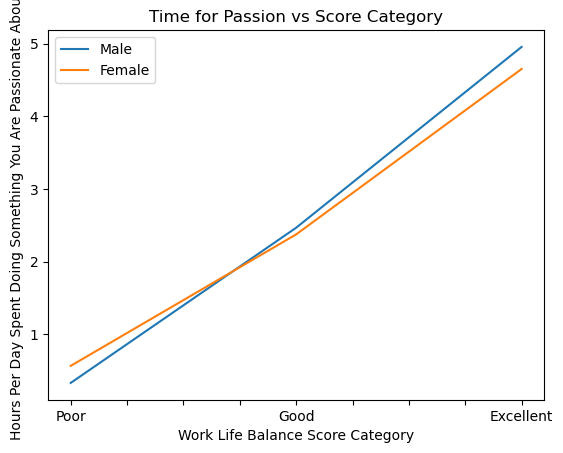

In [31]:
# Plot time for passion vs work life score category
male_passion_mean.plot(label='Male')
female_passion_mean.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Hours Per Day Spent Doing Something You Are Passionate About')
plt.title('Time for Passion vs Score Category')
plt.legend(loc='best')
plt.show()

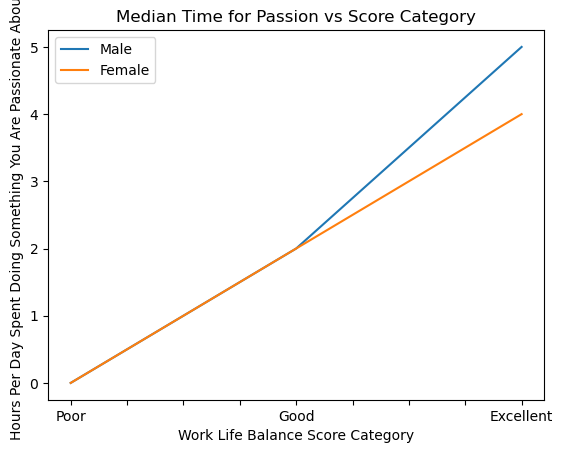

In [32]:
# Plot median (due to high skew value)
male_passion_med.plot(label='Male')
female_passion_med.plot(label='Female')

plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Hours Per Day Spent Doing Something You Are Passionate About')
plt.title('Median Time for Passion vs Score Category')
plt.legend(loc='best')
plt.show()